In [1]:
import sys
sys.path.insert(0, '/home/hongky/project/model_compress/shrinkbench/')
from experiment import PruningExperiment
import pruning

import os
os.environ['DATAPATH'] = '/home/hongky/project/model_compress/shrinkbench/data/'


In [12]:
import pathlib
import pydantic.json

pydantic.json.ENCODERS_BY_TYPE[pathlib.PosixPath] = str
pydantic.json.ENCODERS_BY_TYPE[pathlib.WindowsPath] = str


resnet_version = 'resnet110_100'
model_path = '/home/hongky/project/model_compress/shrinkbench/pretrained/cifar100'
data_set = 'CIFAR100'

from experiment import TrainingExperiment
run_path = model_path + '/' + resnet_version
p = pathlib.Path(run_path)
train_exp = TrainingExperiment(
                        dataset=data_set, 
                        model=resnet_version, 
                        path=run_path, 
                        pretrained=True,
                        train_kwargs={'epochs':100}
                        )
train_exp.run()


import torch 
save_model_path = model_path+'/'+resnet_version+'/'+resnet_version+'.th'
torch.save(train_exp.model.state_dict(), save_model_path)


from models.cifar_resnet import ResNet, BasicBlock

def load_resnet(filters, num_classes, weight_file):
    model = ResNet(BasicBlock, filters, num_classes=num_classes)
    weights = torch.load(weight_file) #.state_dict() #['state_dict']
    # TODO have a better solution for DataParallel models
    # For models trained with nn.DataParallel
    if list(weights.keys())[0].startswith('module.'):
        weights = {k[len("module."):]: v for k, v in weights.items()}
    model.load_state_dict(weights)
    return model


# resnet20 = resnet_factory([3, 3, 3], 10, 'resnet20.th')
# resnet32 = resnet_factory([5, 5, 5], 10, 'resnet32.th')
# resnet44 = resnet_factory([7, 7, 7], 10, 'resnet44.th')
# resnet56 = resnet_factory([9, 9, 9], 10, 'resnet56.th')
# resnet110 = resnet_factory([18, 18, 18], 10, 'resnet110.th')
# resnet1202 = resnet_factory([200, 200, 200], 10, 'resnet1202.th')

# resnet20_100 = resnet_factory([3, 3, 3], 100, 'resnet20_100.th')
# resnet32_100 = resnet_factory([5, 5, 5], 100, 'resnet32_100.th')
# resnet44_100 = resnet_factory([7, 7, 7], 100, 'resnet44_100.th')
# resnet56_100 = resnet_factory([9, 9, 9], 100, 'resnet56_100.th')
resnet110_100 = load_resnet([18, 18, 18], 100, save_model_path)
# resnet1202_100 = resnet_factory([200, 200, 200], 100, 'resnet1202_100.th')

resnet110_100.eval()
example_inputs = torch.rand(1, 3, 224, 224)
model_traced = torch.jit.trace(resnet110_100, example_inputs = example_inputs)
model_traced.save(model_path + '/' + resnet_version + '/' + resnet_version + '_traced.pt') 

Found CIFAR100 under /home/hongky/project/model_compress/shrinkbench/data/CIFAR100
Files already downloaded and verified
Found CIFAR100 under /home/hongky/project/model_compress/shrinkbench/data/CIFAR100
Files already downloaded and verified
Found resnet110_100.th under ../pretrained/cifar100/resnet110_100/resnet110_100.th
Running {
    "save_freq": 10,
    "resume_optim": false,
    "resume": null,
    "pretrained": true,
    "debug": false,
    "train_kwargs": {
        "optim": "SGD",
        "epochs": 100,
        "lr": 0.001
    },
    "dl_kwargs": {
        "batch_size": 128,
        "pin_memory": false,
        "num_workers": 8
    },
    "path": "/home/hongky/project/model_compress/shrinkbench/pretrained/cifar100/resnet110_100",
    "seed": 42,
    "model": "resnet110_100",
    "dataset": "CIFAR100"
}
Logging results to /home/hongky/project/model_compress/shrinkbench/pretrained/cifar100/resnet110_100
Type-path:: <class 'str'>


Train Epoch 0/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 0


Train Epoch 1/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 1


Train Epoch 2/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 2


Train Epoch 3/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 3


Train Epoch 4/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 4


Train Epoch 5/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 5


Train Epoch 6/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 6


Train Epoch 7/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 7


Train Epoch 8/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 8


Train Epoch 9/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 9


Train Epoch 10/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 10


Train Epoch 11/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 11


Train Epoch 12/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 12


Train Epoch 13/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 13


Train Epoch 14/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 14


Train Epoch 15/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 15


Train Epoch 16/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 16


Train Epoch 17/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 17


Train Epoch 18/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 18


Train Epoch 19/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 19


Train Epoch 20/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 20


Train Epoch 21/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 21


Train Epoch 22/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 22


Train Epoch 23/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 23


Train Epoch 24/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 24


Train Epoch 25/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 25


Train Epoch 26/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 26


Train Epoch 27/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 27


Train Epoch 28/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 28


Train Epoch 29/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 29


Train Epoch 30/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 30


Train Epoch 31/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 31


Train Epoch 32/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 32


Train Epoch 33/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 33


Train Epoch 34/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 34


Train Epoch 35/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 35


Train Epoch 36/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 36


Train Epoch 37/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 37


Train Epoch 38/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 38


Train Epoch 39/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 39


Train Epoch 40/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 40


Train Epoch 41/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 41


Train Epoch 42/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 42


Train Epoch 43/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 43


Train Epoch 44/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 44


Train Epoch 45/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 45


Train Epoch 46/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 46


Train Epoch 47/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 47


Train Epoch 48/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 48


Train Epoch 49/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 49


Train Epoch 50/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 50


Train Epoch 51/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 51


Train Epoch 52/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 52


Train Epoch 53/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 53


Train Epoch 54/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 54


Train Epoch 55/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 55


Train Epoch 56/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 56


Train Epoch 57/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 57


Train Epoch 58/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 58


Train Epoch 59/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 59


Train Epoch 60/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 60


Train Epoch 61/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 61


Train Epoch 62/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 62


Train Epoch 63/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 63


Train Epoch 64/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 64


Train Epoch 65/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 65


Train Epoch 66/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 66


Train Epoch 67/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 67


Train Epoch 68/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 68


Train Epoch 69/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 69


Train Epoch 70/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 70


Train Epoch 71/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 71


Train Epoch 72/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 72


Train Epoch 73/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 73


Train Epoch 74/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 74


Train Epoch 75/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 75


Train Epoch 76/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 76


Train Epoch 77/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 77


Train Epoch 78/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 78


Train Epoch 79/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 79


Train Epoch 80/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 80


Train Epoch 81/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 81


Train Epoch 82/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 82


Train Epoch 83/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 83


Train Epoch 84/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 84


Train Epoch 85/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 85


Train Epoch 86/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 86


Train Epoch 87/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 87


Train Epoch 88/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 88


Train Epoch 89/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 89


Train Epoch 90/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 90


Train Epoch 91/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 91


Train Epoch 92/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 92


Train Epoch 93/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 93


Train Epoch 94/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 94


Train Epoch 95/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 95


Train Epoch 96/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 96


Train Epoch 97/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 97


Train Epoch 98/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 98


Train Epoch 99/100:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 99


Val Epoch 99/100: 100%|██████████| 79/79 [00:01<00:00, 49.67it/s, loss=0.019, top1=0.535, top5=0.807] 


In [2]:
from IPython.display import clear_output
clear_output()

model_path = '/home/hongky/project/model_compress/shrinkbench/jupyter/cifar100/resnet110/results/'
os.environ['WEIGHTSPATH'] = '/home/hongky/project/model_compress/shrinkbench/pretrained/cifar10/resnet20/resnet20.th'
for strategy in ['RandomPruning', 'GlobalMagWeight', 'LayerMagWeight']:
    for  c in [1,2,4,8,16,32,64]:
        exp = PruningExperiment(dataset='CIFAR10', 
                                model='resnet20',
                                strategy=strategy,
                                compression=c,
                                path=model_path + '_' + strategy + '_' + str(c),
                                train_kwargs={'epochs':11})
        clear_output()
        exp.run()

Running {
    "save_freq": 10,
    "resume_optim": false,
    "resume": null,
    "pretrained": true,
    "debug": false,
    "train_kwargs": {
        "optim": "SGD",
        "epochs": 11,
        "lr": 0.001
    },
    "dl_kwargs": {
        "batch_size": 128,
        "pin_memory": false,
        "num_workers": 8
    },
    "path": "/home/hongky/project/model_compress/shrinkbench/jupyter/cifar10/resnet20/results/_LayerMagWeight_64",
    "seed": 42,
    "model": "resnet20",
    "dataset": "CIFAR10",
    "strategy": "LayerMagWeight",
    "compression": 64
}
Logging results to /home/hongky/project/model_compress/shrinkbench/jupyter/cifar10/resnet20/results/_LayerMagWeight_64
Type-path:: <class 'str'>


Train Epoch 0/11:   0%|          | 0/391 [00:00<?, ?it/s]

{
    "size": 269722,
    "size_nz": 4223,
    "compression_ratio": 63.86976083353066,
    "flops": 40551040,
    "flops_nz": 334784.0,
    "theoretical_speedup": 121.12597973618811,
    "loss": 0.02833785616521594,
    "val_acc1": 0.11184731012658224,
    "val_acc5": 0.49653876582278517
}
            module   param        comp   size           shape  prunable
0            conv1  weight  107.999999    432   (16, 3, 3, 3)      True
1              bn1  weight    1.000000     16           (16,)     False
2              bn1    bias    1.000000     16           (16,)     False
3   layer1.0.conv1  weight  121.263155   2304  (16, 16, 3, 3)      True
4     layer1.0.bn1  weight    1.000000     16           (16,)     False
5     layer1.0.bn1    bias    1.000000     16           (16,)     False
6   layer1.0.conv2  weight  121.263155   2304  (16, 16, 3, 3)      True
7     layer1.0.bn2  weight    1.000000     16           (16,)     False
8     layer1.0.bn2    bias    1.000000     16           (16,)

Train Epoch 1/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 1


Train Epoch 2/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 2


Train Epoch 3/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 3


Train Epoch 4/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 4


Train Epoch 5/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 5


Train Epoch 6/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 6


Train Epoch 7/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 7


Train Epoch 8/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 8


Train Epoch 9/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 9


Train Epoch 10/11:   0%|          | 0/391 [00:00<?, ?it/s]

Start epoch 10


Val Epoch 10/11: 100%|██████████| 79/79 [00:01<00:00, 56.61it/s, loss=0.0157, top1=0.246, top5=0.777]


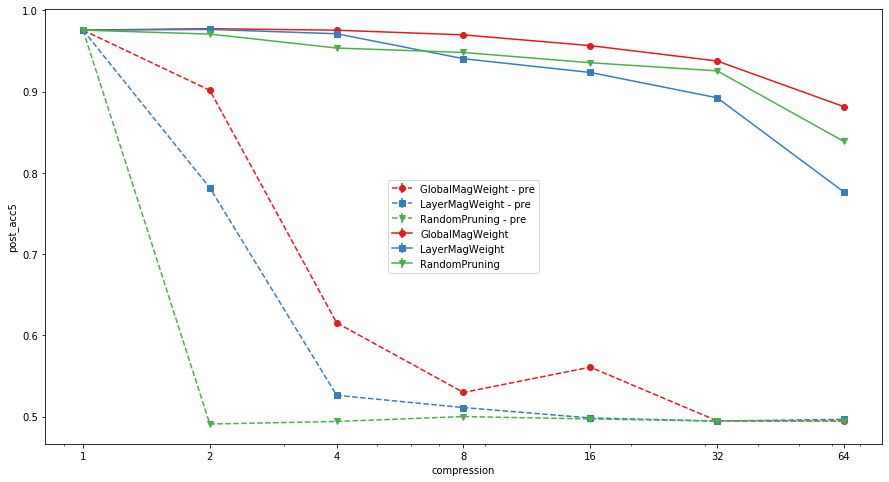

In [3]:
from plot import df_from_results, plot_df
result_path = '/home/hongky/project/model_compress/shrinkbench/jupyter/cifar10/resnet20/results'
df = df_from_results(result_path)
plot_df(df, 'compression', 'pre_acc5', markers='strategy', line='--', colors='strategy', suffix=' - pre')
plot_df(df, 'compression', 'post_acc5', markers='strategy', fig=False, colors='strategy')

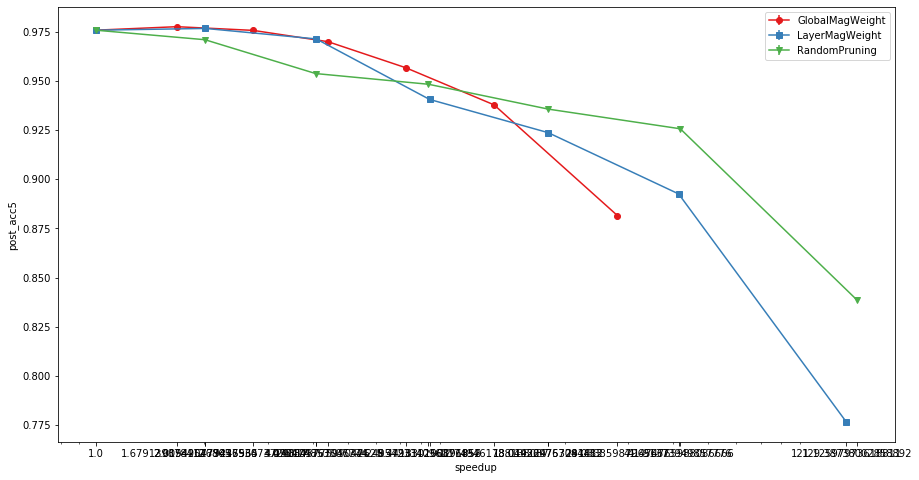

In [4]:
from matplotlib import pyplot as plt
import numpy as np
plot_df(df, 'speedup', 'post_acc5', colors='strategy', markers='strategy')

In [5]:
print(df.columns)
print(df.size)
print(df[['strategy', 'compression', 'speedup', 'post_acc1', 'pre_acc1']])


Index(['dataset', 'model', 'strategy', 'compression', 'size', 'size_nz',
       'real_compression', 'flops', 'flops_nz', 'speedup', 'pre_acc1',
       'pre_acc5', 'post_acc1', 'post_acc5', 'seed', 'batch_size', 'epochs',
       'optim', 'lr', 'completed_epochs', 'path'],
      dtype='object')
630
           strategy  compression     speedup  post_acc1  pre_acc1
3   GlobalMagWeight            1    1.000000   0.765625  0.765625
23  GlobalMagWeight            1    1.000000   0.765625  0.765625
26  GlobalMagWeight            1    1.000000   0.765625  0.765625
29  GlobalMagWeight            1    1.000000   0.765625  0.765625
6   GlobalMagWeight            2    1.679140   0.775910  0.469937
10  GlobalMagWeight            4    2.734165   0.754747  0.140131
1   GlobalMagWeight            8    4.408458   0.702037  0.112243
7   GlobalMagWeight           16    7.249542   0.618078  0.096025
4   GlobalMagWeight           32   12.749462   0.535305  0.098695
13  GlobalMagWeight           64   28.0333

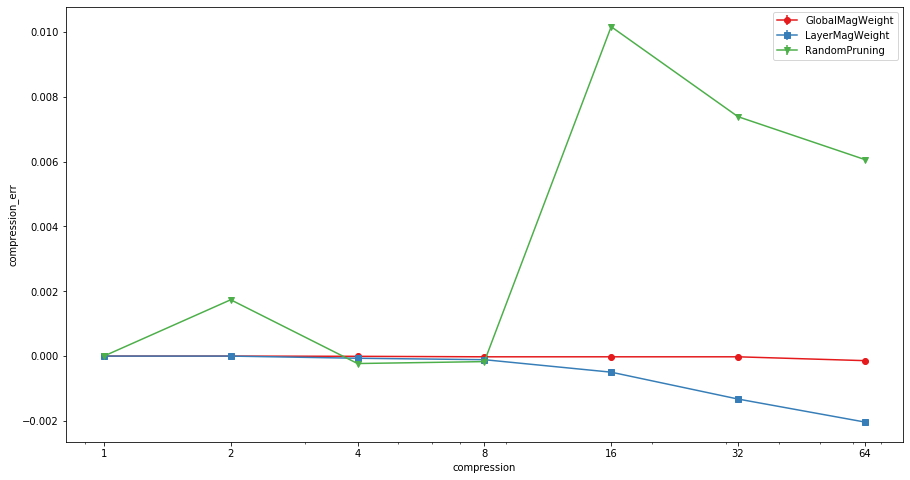

In [6]:
df['compression_err'] = (df['real_compression'] - df['compression'])/df['compression']
plot_df(df, 'compression', 'compression_err', colors='strategy', markers='strategy')